In [55]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [56]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
irisdataset=pd.read_csv('Iris.csv')
irisdataset.head(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

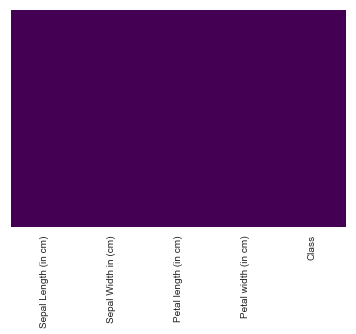

In [57]:
sns.heatmap(irisdataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#since the dataset does not contain any dashes, it means the data does contain any null values. I am still mentioning below the method to fill NA values.
summary=irisdataset.describe() #Getting the five point summary for the dataset
sepallengthmed=summary['Sepal Length (in cm)']['50%']#calculate median for Sepal Length
sepalwidthmed=summary['Sepal Width in (cm)']['50%']#calculate median for Sepal Width
petallengthmed=summary['Petal length (in cm)']['50%']#calculate median for Petal Length
petalwidthmed=summary['Petal width (in cm)']['50%']#calculate median for Petal Width
#we use the fillna method to fill the missing values
irisdataset['Sepal Length (in cm)']=irisdataset['Sepal Length (in cm)'].fillna('sepallengthmed')
irisdataset['Sepal Width in (cm)']=irisdataset['Sepal Width in (cm)'].fillna('sepallengthmed')
irisdataset['Petal length (in cm)']=irisdataset['Petal length (in cm)'].fillna('sepallengthmed')
irisdataset['Petal width (in cm)']=irisdataset['Petal width (in cm)'].fillna('sepallengthmed')


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [58]:
#We use the type category function to change the dataframe to category
irisdataset['Class']=irisdataset['Class'].astype("category").cat.codes
irisdataset.head(5)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [59]:
#we use co-relation function to check the relation and create a heatmap
irisdataset.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


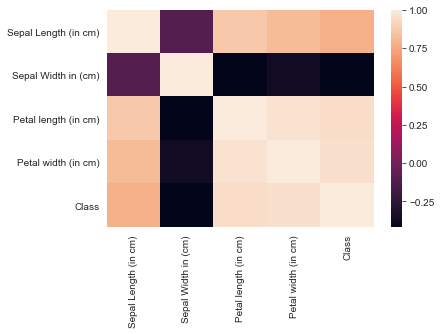

In [60]:
sns.heatmap(irisdataset.corr())
#since the coorelation between the dataset and the target vairable does not lie between 0.1 to -0.1, we do not drop any variables.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [61]:
irisdataset.var()
#since the variance among all the variables is greater than 0.1, we do not drop any variables.

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

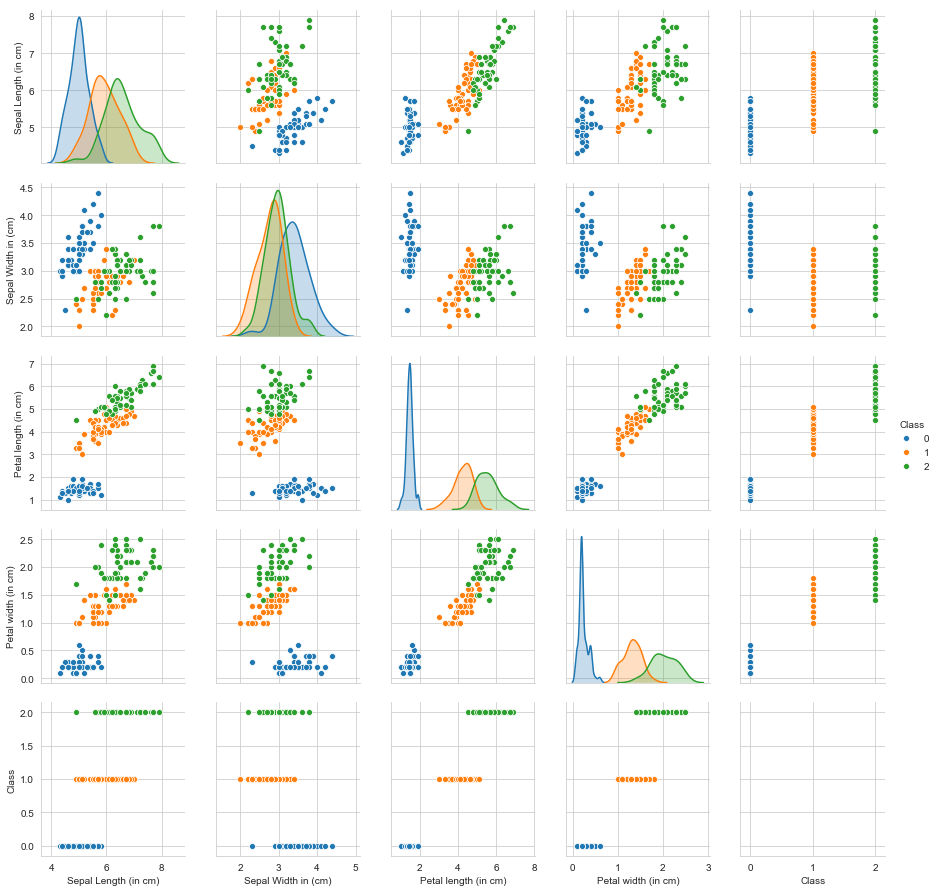

In [62]:
sns.set_style('whitegrid')
sns.pairplot(data=irisdataset, hue='Class')
#we use the pairplot function to check the target variable's dependency on the other features

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [42]:
X=irisdataset.drop('Class', axis=1)
y=irisdataset['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#we use the train test plit function to split the data into 80:20 ratio.

In [49]:
#from sklearn.preprocessing import StandardScaler  
#scaler = StandardScaler()  
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)  
#X_test = scaler.transform(X_test)  

# Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
acc=knn.score(X_test, y_test)
accscore=accuracy_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))
print(acc)
print(accscore)
kvalues=[3,5,9]
for i in kvalues:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test, pred))
    print(acc)
    print(accscore)

[[12  0  0]
 [ 0 10  0]
 [ 0  2  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      1.00      0.91        10
           2       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.94      0.92      0.92        30
weighted avg       0.94      0.93      0.93        30

0.9333333333333333
0.9333333333333333
[[12  0  0]
 [ 0  9  1]
 [ 0  2  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      0.90      0.86        10
           2       0.86      0.75      0.80         8

    accuracy                           0.90        30
   macro avg       0.89      0.88      0.89        30
weighted avg       0.90      0.90      0.90        30

0.9333333333333333
0.9333333333333333
[[12  0  0]
 [ 0 10  0]
 [ 0  2  6]]
              precision    recall  f1-score   suppo

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [64]:
y_test_np=np.asarray(y_test)

In [65]:
misclasserror=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    accscore=accuracy_score(y_test,pred)
    err=1-accscore
    misclasserror.append(err)
    #misclasserror.append(np.mean(pred_i != y_test_np))
    

In [66]:
misclasserror

[0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.033333333333333326,
 0.06666666666666665]

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

Text(0, 0.5, 'Mean Error')

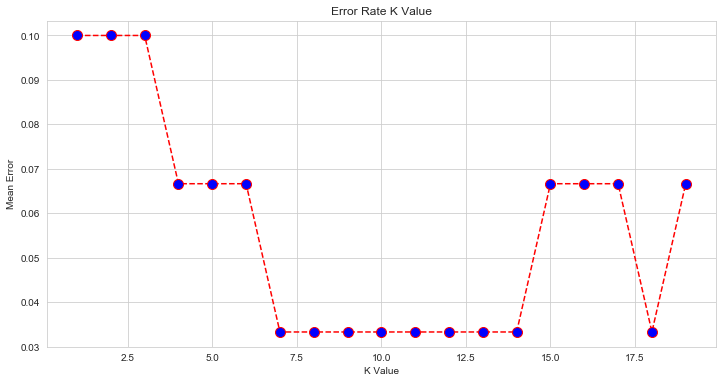

In [67]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), misclasserror, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

# Naive Bayes with Iris Data

In [20]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [21]:
X=irisdataset.drop('Class', axis=1)
y=irisdataset['Class']

In [22]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int8
     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6       

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [23]:
#we group the data nased on the target variable.
Classcount=irisdataset.groupby(['Class']).count()
Classcount

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


([array([0., 0., 0., 0., 0., 4., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 4., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 4., 0., 0., 0., 0.])],
 array([49.5, 49.6, 49.7, 49.8, 49.9, 50. , 50.1, 50.2, 50.3, 50.4, 50.5]),
 <a list of 3 Lists of Patches objects>)

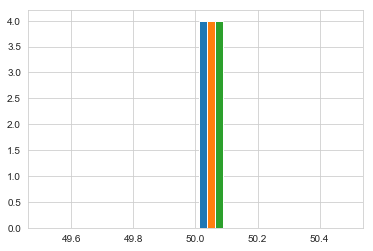

In [75]:
plt.hist(Classcount)
#plot the data using histogram

In [68]:
#Drop Id variable from data
irisdata=irisdataset.style.hide_index()
irisdata

Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
5.1,3.5,1.4,0.2,0
4.9,3,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5,3.6,1.4,0.2,0
5.4,3.9,1.7,0.4,0
4.6,3.4,1.4,0.3,0
5,3.4,1.5,0.2,0
4.4,2.9,1.4,0.2,0
4.9,3.1,1.5,0.1,0


### Question 12 
Find Correlation among all variables and give your insights 

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [69]:
irisdataset.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


### Split data in Training and test set in 80:20.

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Question 13 
Do Feature Scaling 

In [28]:
# Use StandardScaler or similar methods

In [71]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

### Question 14 
Train and Fit NaiveBayes Model

In [72]:
#Fit the model
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, y_train)

In [73]:
#Predict
y_pred_GNB=clf_GNB.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [74]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_GNB)
print(confusion_matrix)

[[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]


In [75]:
# show accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_GNB)

0.9333333333333333

In [34]:
#Show precision and Recall metrics

In [76]:
print(classification_report(y_test,y_pred_GNB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

